In [2]:
from PIL import Image

In [3]:
# img = Image.open('data.tiff')
# img = Image.open('reference.tiff')

In [4]:
# img.show()

In [5]:
import numpy as np
from skimage.external.tifffile import imread

In [6]:
himg = imread("data.tiff")

In [7]:
himg.shape

(900, 1000, 61)

In [8]:
print(np.max(himg))

80075.0


In [9]:
himg = himg / 2**16

In [10]:
print(np.max(himg))

1.2218475341796875


In [11]:
print(np.min(himg))

-0.027191162109375


In [12]:

np.count_nonzero(himg < 0)

9391

61
46の0の数1
48の0の数2
49の0の数2
50の0の数14
51の0の数29
52の0の数53
53の0の数495
54の0の数1156
55の0の数1313
56の0の数1103
57の0の数890
58の0の数961
59の0の数1279
60の0の数2093


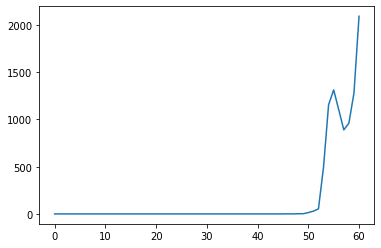

In [13]:
import matplotlib.pyplot as plt
hlen = len(himg[0,0,:])
print(hlen)
zero_count = []
for i in range(hlen):
    zero_count.append(np.count_nonzero(himg[:,:,i] < 0))
    if np.count_nonzero(himg[:,:,i] < 0) != 0:
        print("%dの0の数%d"%(i, np.count_nonzero(himg[:,:,i] < 0)))
# print(min(zero_count))
# print(max(zero_count))
plt.plot(zero_count)

In [14]:
print(len(zero_count))

61


0
255


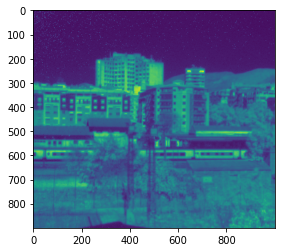

In [15]:
# img = Image.fromarray(himg[:,:,0])
img = Image.fromarray(np.uint8(himg[:,:,58]*255))
plt.imshow(np.uint8(himg[:,:,60]*255))
img.show()
img = np.asarray(img)
print(np.min(img))
print(np.max(img))


In [16]:
cmf = np.loadtxt("CIE1931-2deg-XYZ.csv",delimiter=",")

In [17]:
cmf = cmf[np.where(cmf[:,0] >= 400)]
cmf = cmf[::2]
cmf = cmf[:,1:]

In [18]:
cmf.shape

(44, 4)

In [19]:
# cmfだけ
nhimg = himg[:,:,:44]

In [20]:
sd_light_source = np.loadtxt("lamp_spectrum.csv", skiprows=1,dtype="float")
sd_light_source = sd_light_source[np.where(sd_light_source[:,0] >= 400)]
sd_light_source = sd_light_source[::20,1:2]
sd_light_source = sd_light_source[:44]
print(sd_light_source)

[[8.0381e-06]
 [4.9402e-05]
 [7.9463e-04]
 [2.5200e-03]
 [5.0425e-03]
 [6.5314e-03]
 [2.9934e-03]
 [1.6326e-03]
 [1.2086e-03]
 [1.5629e-03]
 [3.2179e-03]
 [6.2438e-03]
 [9.6562e-03]
 [1.2211e-02]
 [1.3466e-02]
 [1.4078e-02]
 [1.4304e-02]
 [1.3816e-02]
 [1.3504e-02]
 [1.3538e-02]
 [1.5654e-02]
 [2.3630e-02]
 [4.3653e-02]
 [2.2712e-02]
 [7.8853e-03]
 [4.9094e-03]
 [3.7102e-03]
 [2.7212e-03]
 [2.0964e-03]
 [1.5355e-03]
 [1.1735e-03]
 [7.9114e-04]
 [6.6069e-04]
 [2.4682e-04]
 [3.1246e-04]
 [1.4981e-04]
 [9.5595e-05]
 [0.0000e+00]
 [3.0264e-04]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]]


In [33]:
sd_light_source = np.loadtxt("lamp_spectrum.csv", skiprows=1,dtype="float")
sd_light_source = sd_light_source[np.where(sd_light_source[:,0] >= 400)]
sd_light_source = sd_light_source[::20,1:2]
sd_light_source = sd_light_source[:44]

array([[4.000000e+02, 1.431000e-02, 3.960000e-04, 6.785001e-02],
       [4.100000e+02, 4.351000e-02, 1.210000e-03, 2.074000e-01],
       [4.200000e+02, 1.343800e-01, 4.000000e-03, 6.456000e-01],
       [4.300000e+02, 2.839000e-01, 1.160000e-02, 1.385600e+00],
       [4.400000e+02, 3.482800e-01, 2.300000e-02, 1.747060e+00],
       [4.500000e+02, 3.362000e-01, 3.800000e-02, 1.772110e+00],
       [4.600000e+02, 2.908000e-01, 6.000000e-02, 1.669200e+00],
       [4.700000e+02, 1.953600e-01, 9.098000e-02, 1.287640e+00],
       [4.800000e+02, 9.564000e-02, 1.390200e-01, 8.129501e-01],
       [4.900000e+02, 3.201000e-02, 2.080200e-01, 4.651800e-01],
       [5.000000e+02, 4.900000e-03, 3.230000e-01, 2.720000e-01],
       [5.100000e+02, 9.300000e-03, 5.030000e-01, 1.582000e-01],
       [5.200000e+02, 6.327000e-02, 7.100000e-01, 7.824999e-02],
       [5.300000e+02, 1.655000e-01, 8.620000e-01, 4.216000e-02],
       [5.400000e+02, 2.904000e-01, 9.540000e-01, 2.030000e-02],
       [5.500000e+02, 4.3

In [21]:
nmf_multi_ld = cmf * sd_light_source
print(nmf_multi_ld.shape)
x = nmf_multi_ld[:,0]
y = nmf_multi_ld[:,1]
z = nmf_multi_ld[:,2]
k = 100/np.sum(y)
print(k)

(44, 3)
686.3250612373361


In [22]:
X = np.sum(x*nhimg, axis=2)
Y = np.sum(y*nhimg,axis=2)
Z = np.sum(z*nhimg, axis=2)

In [23]:
XYZ = np.stack([X,Y,Z], 2)
XYZ = XYZ * k
XYZ.shape

(900, 1000, 3)

In [36]:
# xyz_to_rgb = np.array([[0.41847, -0.15866, -0.082835],[-0.091169, 0.25243, 0.015708], [0.00092090, -0.0025498, 0.17860]] )
# rgb_to_xyz = np.array([[0.4900, 0.31, 0.2],[0.17697, 0.81240, 0.010630], [0, 0.01, 0.99]])

rgb_to_xyz = 1/0.17697 * rgb_to_xyz
xyz_to_rgb = np.linalg.inv(rgb_to_xyz)
print(xyz_to_rgb.shape)

(3, 3)


In [39]:
xyz_to_r = np.array([0.41847, -0.15866, -0.082835],)
r = np.dot(XYZ, xyz_to_r)
# print(r.shape)
xyz_to_g = np.array([-0.091169, 0.25243, 0.015708])
g = np.dot(XYZ, xyz_to_g)
xyz_to_b = np.array([0.00092090, -0.0025498, 0.17860])
b = np.dot(XYZ, xyz_to_b)
rgb_img = np.stack([r,g,b],axis=2)
print(rgb_img.shape)
print(np.max(rgb_img))
print(np.min(rgb_img))
img =Image.fromarray(np.uint8(rgb_img))
img.save("made_rgb_img_by_CIE1931_RGB.png")

(900, 1000, 3)
34.23584480625362
0.08115564352249731


In [25]:
rgb_img =  np.dot(XYZ, xyz_to_rgb )
rgb_img.shape

(900, 1000, 3)

In [26]:
print(rgb_img.shape)
print(np.max(rgb_img))
print(np.min(rgb_img))

(900, 1000, 3)
44.50695284630758
-5.439640471637056


In [27]:
# xyz_to_r = np.array([0.41847, -0.15866, -0.082835])
xyz_to_r = np.array([3.2410, -1.5374, -0.4986])
r = np.dot(XYZ, xyz_to_r)
# print(r.shape)
xyz_to_g = np.array([-0.9692, 1.8760, 0.0416])
g = np.dot(XYZ, xyz_to_g)
xyz_to_b = np.array([0.0556, -0.204, 1.0570])
b = np.dot(XYZ, xyz_to_b)
rgb_img2 = np.stack([r,g,b],axis=2)


(900, 1000)


In [32]:
print(rgb_img2.shape)
print(np.max(rgb_img2))
print(np.min(rgb_img2))
# img =Image.fromarray(rgb_img)
# img.save("made_rgb_img.png")

(900, 1000, 3)
232.9712086283906
-5.660450856145034


In [29]:
# rgb_img2*2**8
# print(np.max(rgb_img2*2**8))
# print(np.min(rgb_img2*2**8))
img =Image.fromarray(np.uint8(rgb_img2))
img.save("made_rgb_img.png")

In [35]:
xyz_to_rgb = np.array([[3.2406, -1.5372, -0.4986],[-0.9689, 1.8758, 0.0415],[0.0557, -0.204, 1.0570]])
# r = np.dot(XYZ, xyz_to_r)
# print(r.shape)
# rgb_img3 =  np.dot(XYZ, xyz_to_rgb )
print(rgb_img3.shape)
print(np.max(rgb_img3))
print(np.min(rgb_img3))

# 2.3706743 -0.9000405 -0.4706338
# -0.5138850  1.4253036  0.0885814
#  0.0052982 -0.0146949  1.0093968

(900, 1000, 3)
315.21031629937244
-36.61076716398714


In [43]:
from colour import SpectralDistribution

ImportError: cannot import name 'SpectralDistribution' from 'colour' (/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/colour.py)